# ***Laporan Proyek Machine Learning: Predictive Analytics On Adults Income - Vian Sebastian Bromokusumo***

### ***Domain Proyek***

---

**Latar Belakang**


Menurut survei oleh Badan Pusat Statistik Indonesia yang dipublikasikan pada 6 November 2023, tingkat pengangguran di Indonesia adalah sebesar 5,32 persen [[1]](https://www.bps.go.id/id/pressrelease/2023/11/06/2002/tingkat-pengangguran-terbuka--tpt--sebesar-5-32-persen-dan-rata-rata-upah-buruh-sebesar-3-18-juta-rupiah-per-bulan.html). Meskipun hal ini merupakan penurunan dari tahun-tahun sebelumnya, hal ini tetap menjadi isu yang perlu terus diselesaikan. Hasil penelitian Pramudjasi dan Juliansyah, 2019 dalam Jurnal FEB Unmul [[2]](https://journal.feb.unmul.ac.id/index.php/KINERJA/article/download/5284/472) menyatakan bahwa jumlah penduduk berpengaruh positif terhadap tingkat pengangguran secara signifikan. Hal ini dikuatkan pula dalam penelitian Sari dan Pangestuty , 2022 dalam  [[3]](https://jdess.ub.ac.id/index.php/jdess/article/download/78/57/373) menyatakan bahwa pertambahan jumlah penduduk berdampak pada kenaikan Tingkat Pengangguran Terbuka. Berbagai survei dan penemuan dari jurnal akademik ini menjadi latar belakang Penulis dalam mencoba menganalisa faktor-faktor apa saja yang memiliki keterkaitan kuat terhadap pengangguran, pekerjaan, terutama faktor yang memiliki keterkaitan terhadap pendapatan yang tinggi.

Proyek ini difokuskan pada analisis dataset "Adults Income" dengan tujuan untuk mengidentifikasi dan memprediksi faktor-faktor yang memiliki korelasi tinggi, atau bahkan berkontribusi terhadap pekerjaan terutama jumalah pendapatan seseorang. Dalam hal ini, target fitur dari dataset ini adalah apakah pendapatan per tahun seseorang <50.000 dolar atau >= 50.000 dolar per tahun, sehingga proyek ini akan menyelesaikan kasus klasifikasi. Meskipun dataset ini diambil dari data sensus 1996, dataset ini masih memiliki relevansi yang signifikan di masa kini, karena sifat umum dari variabel-variabel di dataset ini dan tidak adanya perubahan yang drastis pada komponen-komponen penentu penghasilan.

Menurut Jepchumba dari Microsoft [[4]](https://techcommunity.microsoft.com/t5/educator-developer-blog/getting-started-with-using-visual-machine-learning-tools-for/ba-p/3578397), *machine learning* merupakan teknik yang menggunakan matematika tingkat tinggi dan ilmu statistika untuk mengenali pola pada data yang tidak ada secara eksplisit, dan dapat memprediksi sesuai dengan hasil pola tersebut. Dengan beragamnya faktor-faktor (variabel) yang terlibat dalam proyek ini, machine learning menjadi solusi yang terbaik. Identifikasi dan prediksi faktor-faktor akan dilakukan dengan cara mengaplikasikan teknik-teknik *data analysis* seperti *Exploratory Data Analysis* (EDA)  dan menggunakan algoritma-algoritma *Machine Learning* seperti *Random Forest, K-Nearest Neighbors,* dan *Boosting*.

Proyek ini menjadi sarana kecil untuk membantu menyelesaikan masalah sulitnya mencari kerja, dengan menganalisis dinamika faktor-faktor pendapatan per tahun yang tinggi. Hasil dari proyek ini diharapkan dapat membantu Pemerintah dan individu-individu di usia produktif sebagai tambahan *insight* terkait masalah ini, dan membantu pihak-pihak tersebut untuk mengembangkan masyarakat dan diri sendiri untuk peningkatan kualitas hidup.




### ***Business Understanding***

---
Stakeholder dan sasaran:
1. Pemerintah
Sebagai organisasi tingkat tertinggi di sebuah negara, pemerintah dapat membuat kebijakan-kebijakan dan perubahan yang baik, guna meningkatkan kualitas hidup rakyatnya. Salah satu caranya ialah membuat/memperbaiki sistem di negaranya untuk mendorong kemajuan sumber daya manusianya.
2. Individu
Pada tingkat individu, diharapkan hasil proyek ini dapat memberikan insight terhadap faktor-faktor penting yang dapat meningkatkan kualitas hidupnya, melalui pekerjaan dan pekerjaan dengan pendapatan per tahun yang tinggi.

**Problem Statements**
1. Dari berbagai fitur, apa yang paling berpengaruh terhadap income (pendapatan)?
2. Dengan karakteristik tertentu, apakah income dapat diprediksi?  

*income merujuk pada pendapatan per tahun.

**Predictive Modelling Goals**
1. Mengetahui fitur-fitur yang memiliki kaitan yang tinggi terhadap income.
2. Dapat memprediksi income dengan akurasi di atas 90%.

**Solution Statements (Metodologi)**
1. Target feature pada dataset ini merupakan variable boolean antara >50k dan <= 50k, sehingga kasus ini merupakan kasus prediksi Klasifikasi.

2. Model/algoritma yang akan digunakan untuk menyelesaikan kasus ini adalah:
- K-Nearest Neighbor
- Random Forest
- XGBoost
- AdaBoost

3. Dataset ini memiliki fitur tingkat pendidikan, yang mana bersifat ordinal, sehingga Penulis juga ingin menguji keterkaitan ordinalitas data, menggunakan metode *Ordinal Encoding vs One Hot Encoding*.

4. Penulis juga ingin menguji dampak missing values handling antara *KNN Imputation vs Drop* pada akurasi model.

5. Metrik Evaluasi yang akan digunakan pada proyek ini adalah:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix, sebagai visualisasi



### ***Data Understanding***

---

Dataset: https://archive.ics.uci.edu/dataset/2/adult

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding Machine Learning Implementation/archive (4)/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Sejauh ini, kita dapat menarik kesimpulan bahwa terdapat:
1. 9 object columns.
2. 6 integer columns.
3. Jumlah sampel 48.842 data.
4. Jumlah fitur 14 kolom, dan target 1 kolom.
5. Missing values ditandai dengan "?"

---



In [86]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [87]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [88]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [89]:
missing_values_check = df.columns[df.eq('?').any()]

print(missing_values_check)

Index(['workclass', 'occupation', 'native-country'], dtype='object')


Dari sini dapat kita konfirmasikan bahwa missing values ditandai dengan '?'. Pada umumnya, missing values dapat juga berupa NaN atau Null.

---



In [90]:
df.rename(columns = {
    'education' : 'educationClass',
    'educational-num' : 'educationLevel',
    'marital-status' : 'status',
    'capital-gain' : 'gain',
    'capital-loss' : 'loss',
    'hours-per-week' : 'hours',
    'native-country' : 'native' }, inplace = True)

df

,age,workclass,fnlwgt,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [91]:
workclass_missing = (df.workclass == '?').sum()
occ_missing = (df.occupation == '?').sum()
native_missing = (df.native == '?').sum()

print(f"workclass missing values = {workclass_missing}")
print(f"occupation missing values = {occ_missing}")
print(f"native missing values = {native_missing}")

workclass missing values = 2799
occupation missing values = 2809
native missing values = 857


Terdapat beberapa metode yang dapat dilakukan terkait missing values ini. Dikarenakan rasio dari missing values terhadap total sampel dapat terbilang cukup kecil, dengan worst case scenario 1:7, metode Drop masih sangat baik dilakukan.

---



In [92]:
# map target to binary classification
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# drop unnecesarry columns
df.drop(columns = 'fnlwgt', inplace = True, axis = 1)

***EDA - Univariate Analysis***

---



                  sample count  percentage
Private                  33906        69.4
Self-emp-not-inc          3862         7.9
Local-gov                 3136         6.4
?                         2799         5.7
State-gov                 1981         4.1
Self-emp-inc              1695         3.5
Federal-gov               1432         2.9
Without-pay                 21         0.0
Never-worked                10         0.0


<Axes: title={'center': 'workclass'}>

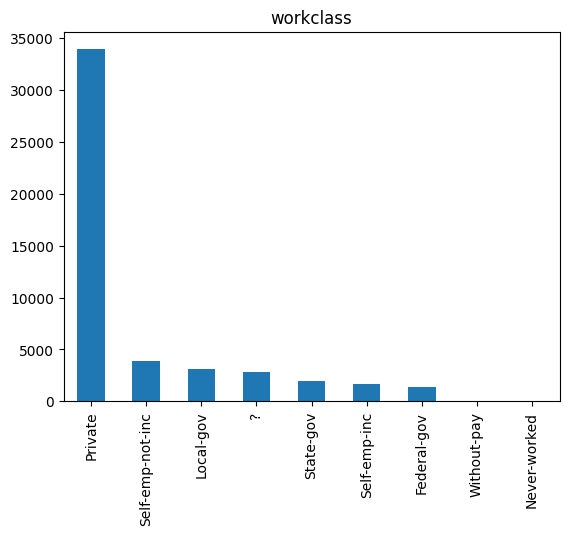

In [93]:
obj_cols = df.select_dtypes(include = ['object'])

feature = obj_cols.columns[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

              sample count  percentage
HS-grad              15784        32.3
Some-college         10878        22.3
Bachelors             8025        16.4
Masters               2657         5.4
Assoc-voc             2061         4.2
11th                  1812         3.7
Assoc-acdm            1601         3.3
10th                  1389         2.8
7th-8th                955         2.0
Prof-school            834         1.7
9th                    756         1.5
12th                   657         1.3
Doctorate              594         1.2
5th-6th                509         1.0
1st-4th                247         0.5
Preschool               83         0.2


<Axes: title={'center': 'educationClass'}>

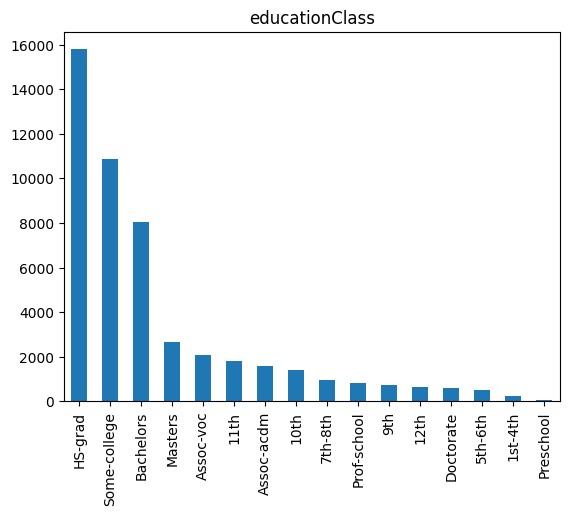

In [94]:
feature = obj_cols.columns[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                       sample count  percentage
Married-civ-spouse            22379        45.8
Never-married                 16117        33.0
Divorced                       6633        13.6
Separated                      1530         3.1
Widowed                        1518         3.1
Married-spouse-absent           628         1.3
Married-AF-spouse                37         0.1


<Axes: title={'center': 'status'}>

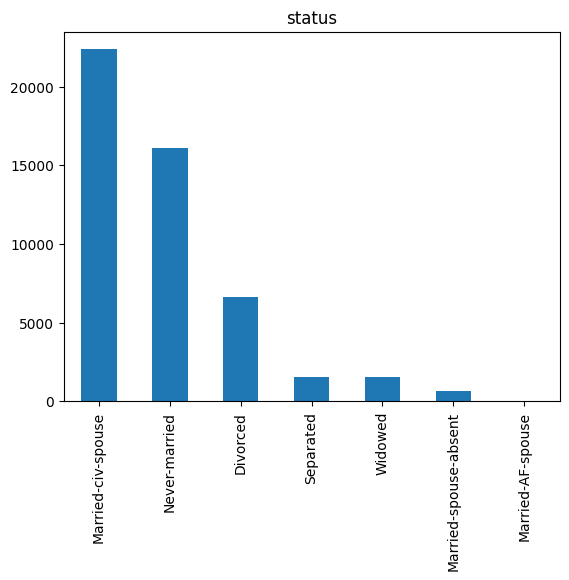

In [95]:
feature = obj_cols.columns[2]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                   sample count  percentage
Prof-specialty             6172        12.6
Craft-repair               6112        12.5
Exec-managerial            6086        12.5
Adm-clerical               5611        11.5
Sales                      5504        11.3
Other-service              4923        10.1
Machine-op-inspct          3022         6.2
?                          2809         5.8
Transport-moving           2355         4.8
Handlers-cleaners          2072         4.2
Farming-fishing            1490         3.1
Tech-support               1446         3.0
Protective-serv             983         2.0
Priv-house-serv             242         0.5
Armed-Forces                 15         0.0


<Axes: title={'center': 'occupation'}>

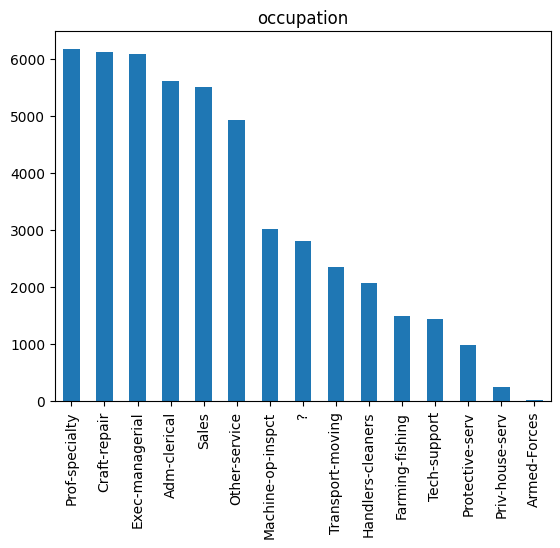

In [96]:
feature = obj_cols.columns[3]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

In [97]:
replacement_dict = {
    'Prof-specialty': 'Specialty',
    'Craft-repair': 'Repair',
    'Exec-managerial': 'Managerial',
    'Adm-clerical': 'Clerical',
    'Other-service': 'Others',
    'Machine-op-inspct': 'Inspection',
    'Transport-moving': 'Transport',
    'Handlers-cleaners': 'Cleaners',
    'Farming-fishing': 'Agriculture',
    'Tech-support': 'ITSup',
    'Protective-serv': 'ProtectiveService',
    'Priv-house-serv': 'PrivateHouse Service',
    'Armed-Forces': 'ArmedForces'
}

df['occupation'] = df['occupation'].replace(replacement_dict)

                sample count  percentage
Husband                19716        40.4
Not-in-family          12583        25.8
Own-child               7581        15.5
Unmarried               5125        10.5
Wife                    2331         4.8
Other-relative          1506         3.1


<Axes: title={'center': 'relationship'}>

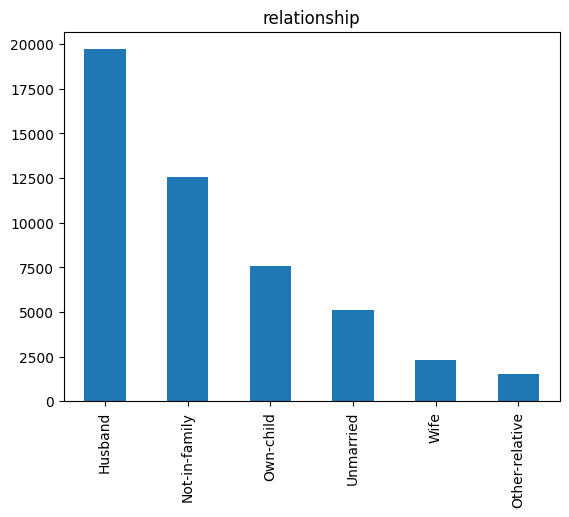

In [98]:
feature = obj_cols.columns[4]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

                    sample count  percentage
White                      41762        85.5
Black                       4685         9.6
Asian-Pac-Islander          1519         3.1
Amer-Indian-Eskimo           470         1.0
Other                        406         0.8


<Axes: title={'center': 'race'}>

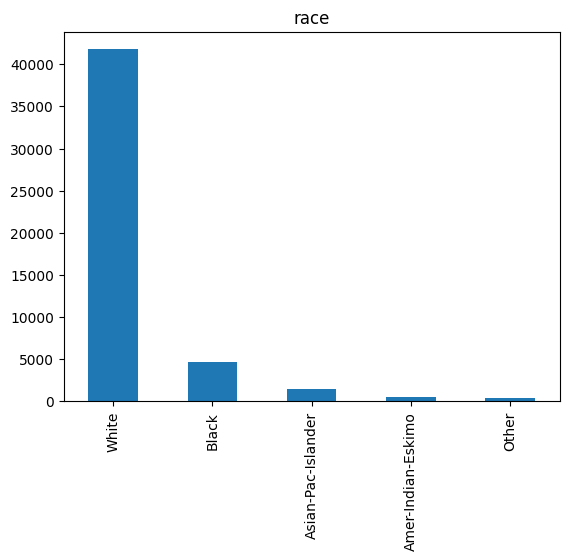

In [99]:
feature = obj_cols.columns[5]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

        sample count  percentage
Male           32650        66.8
Female         16192        33.2


<Axes: title={'center': 'gender'}>

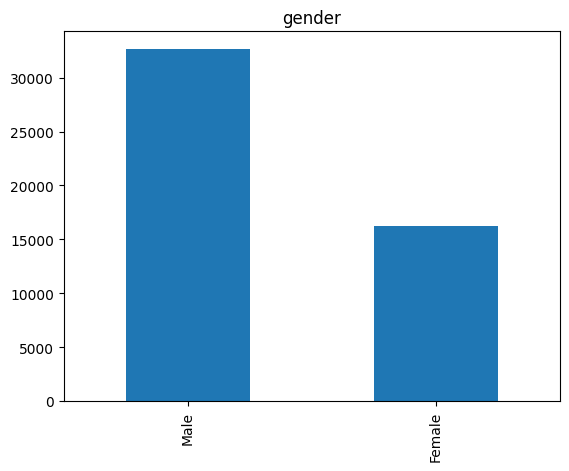

In [100]:
feature = obj_cols.columns[6]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

In [101]:
replacement_dict = {
      'United-States' : 'USA',
      'Puerto-Rico' : 'PuertoRic',
      'El-Savador' : 'ElSavad',
      'Dominican-Republic' : 'Dominican',
      'Trinadad&Tobago' : 'Trinadad',
      'Outlying-US(Guam-USVI-etc)' : 'USBor',
      'Holand-Netherlands' : 'Holland'
}

df['native'] = df['native'].replace(replacement_dict)

             sample count  percentage
USA                 43832        89.7
Mexico                951         1.9
?                     857         1.8
Philippines           295         0.6
Germany               206         0.4
PuertoRic             184         0.4
Canada                182         0.4
El-Salvador           155         0.3
India                 151         0.3
Cuba                  138         0.3
England               127         0.3
China                 122         0.2
South                 115         0.2
Jamaica               106         0.2
Italy                 105         0.2
Dominican             103         0.2
Japan                  92         0.2
Guatemala              88         0.2
Poland                 87         0.2
Vietnam                86         0.2
Columbia               85         0.2
Haiti                  75         0.2
Portugal               67         0.1
Taiwan                 65         0.1
Iran                   59         0.1
Greece      

<Axes: title={'center': 'native'}>

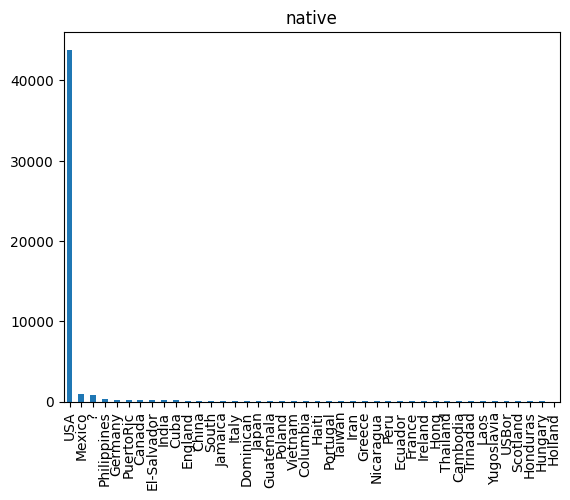

In [83]:
feature = obj_cols.columns[7]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

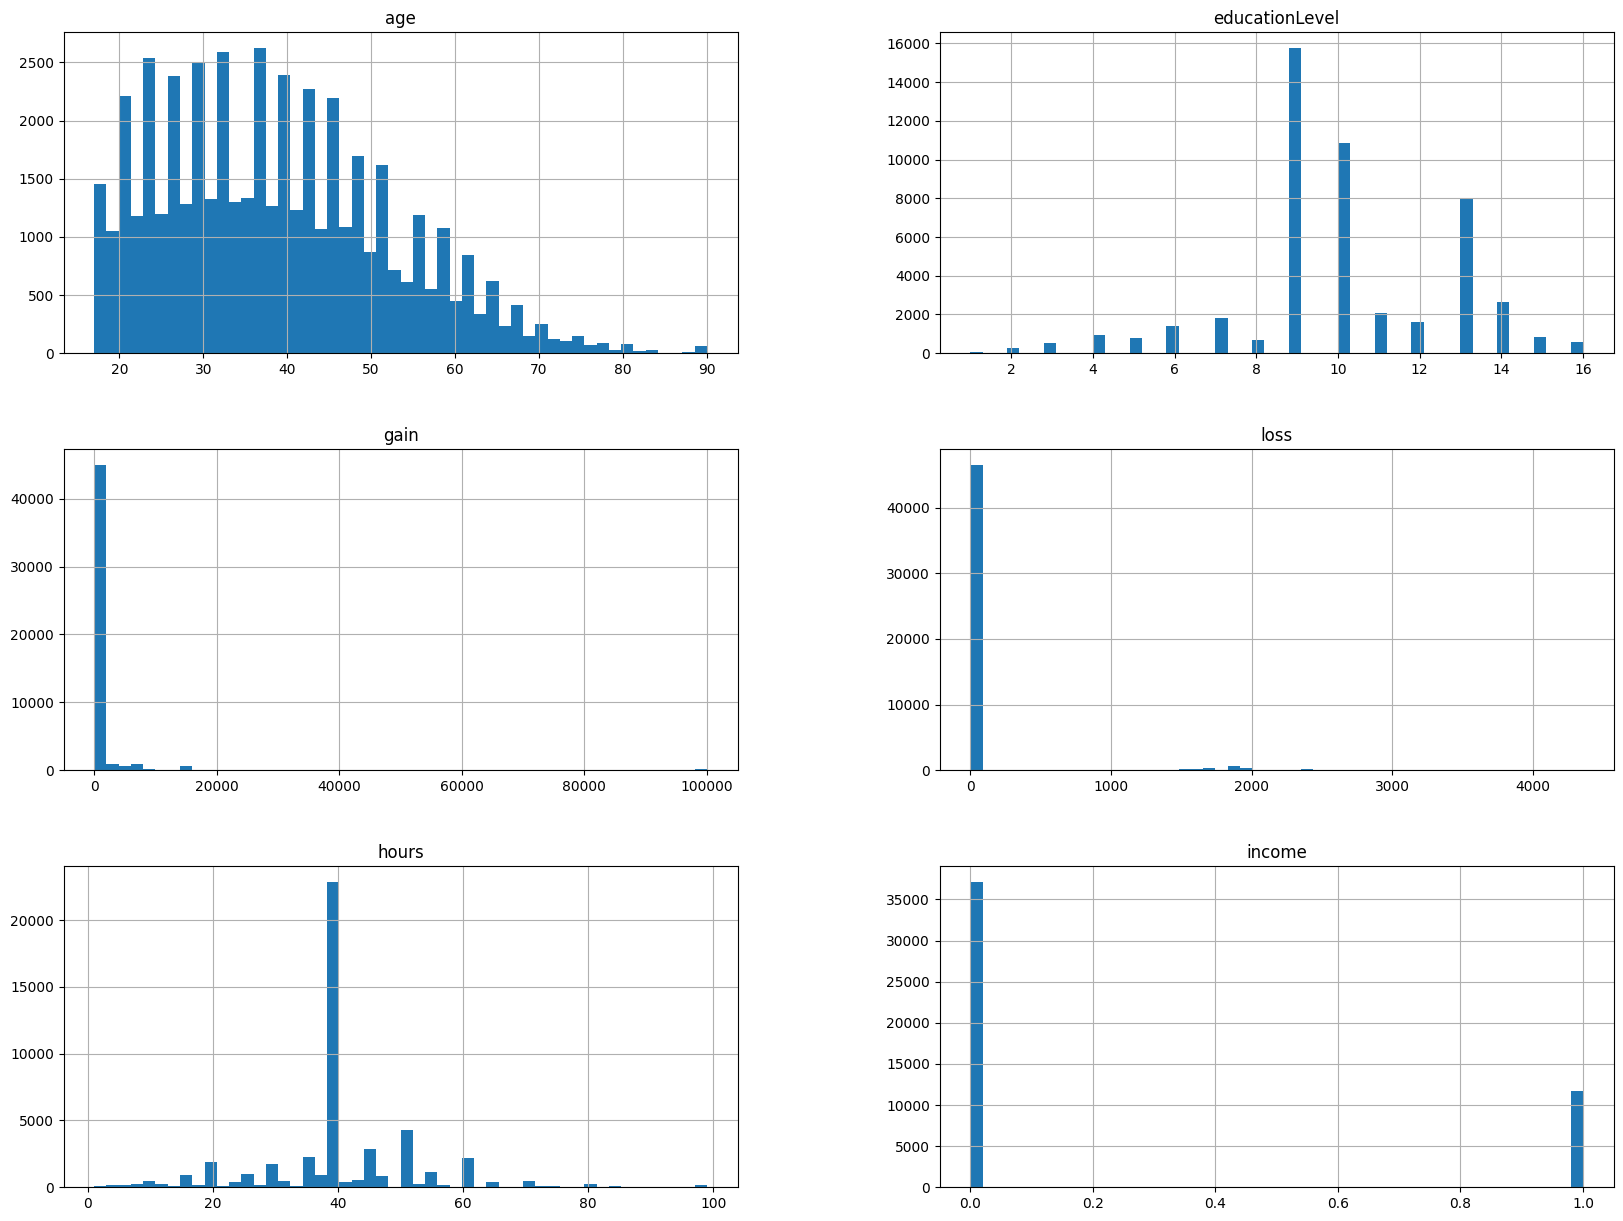

In [102]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

Dari hasil Univariate Analysis, dapat dilihat bahwa dataset memiliki kecenderungan yang tinggi pada perbedaan modus dan data yang lain yang sangat besar. Hal ini menyiratkan bahwa dataset ini dapat juga diatasi missing valuesnya menggunakan metode statistik, seperti *mode imputation*.

***EDA - Multivariate Analysis***

---



<ipython-input-103-b0128f87dc04>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
<ipython-input-103-b0128f87dc04>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
<ipython-input-103-b0128f87dc04>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
<ipython-input-103-b0128f87dc04>:7: FutureWarning: 

Passing `palette` wi

<Figure size 1500x800 with 0 Axes>

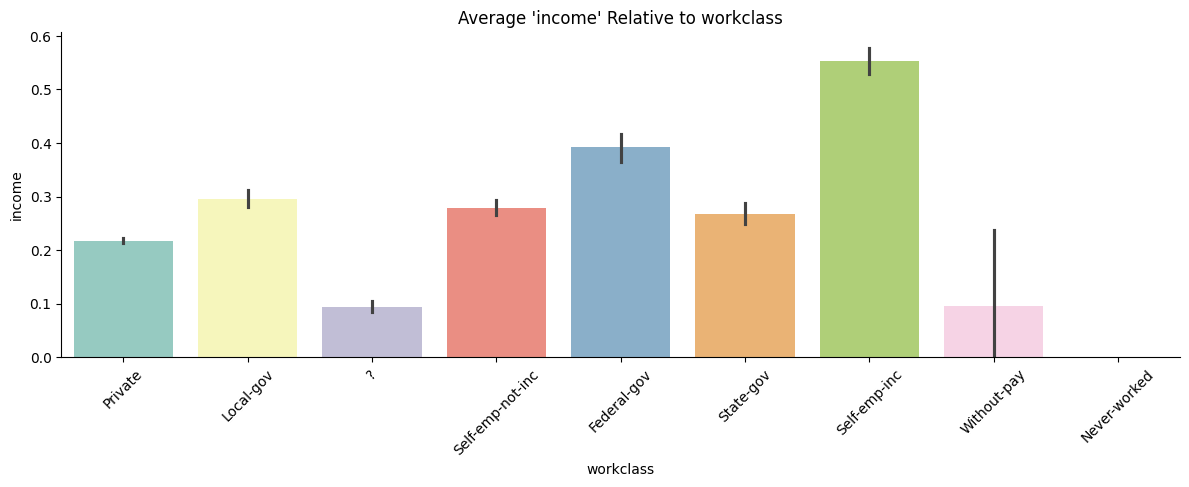

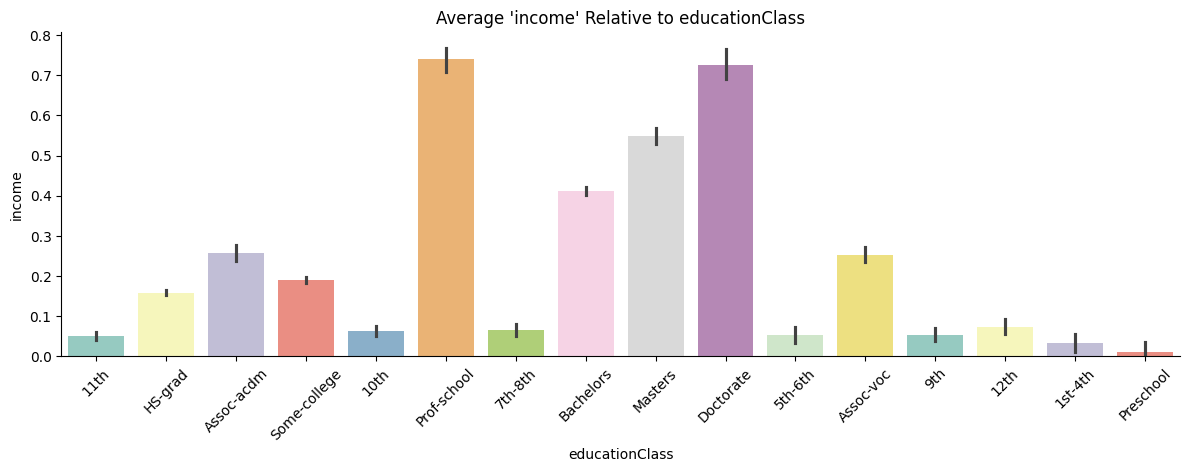

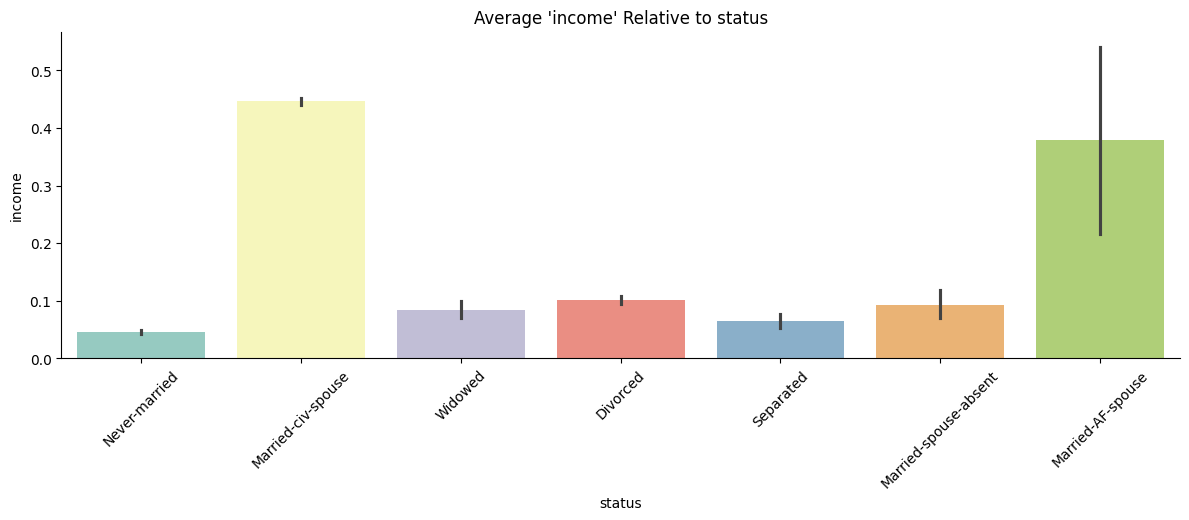

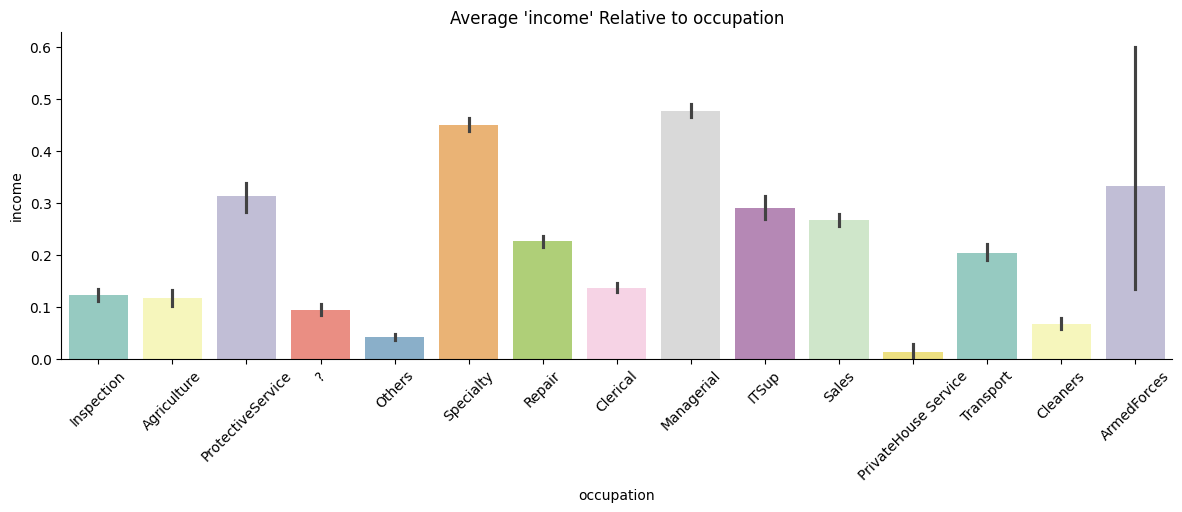

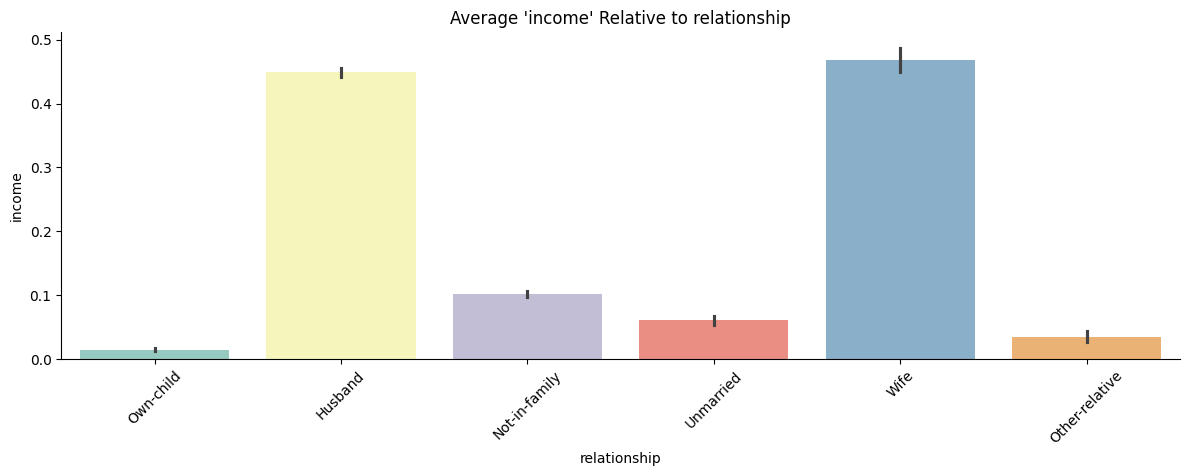

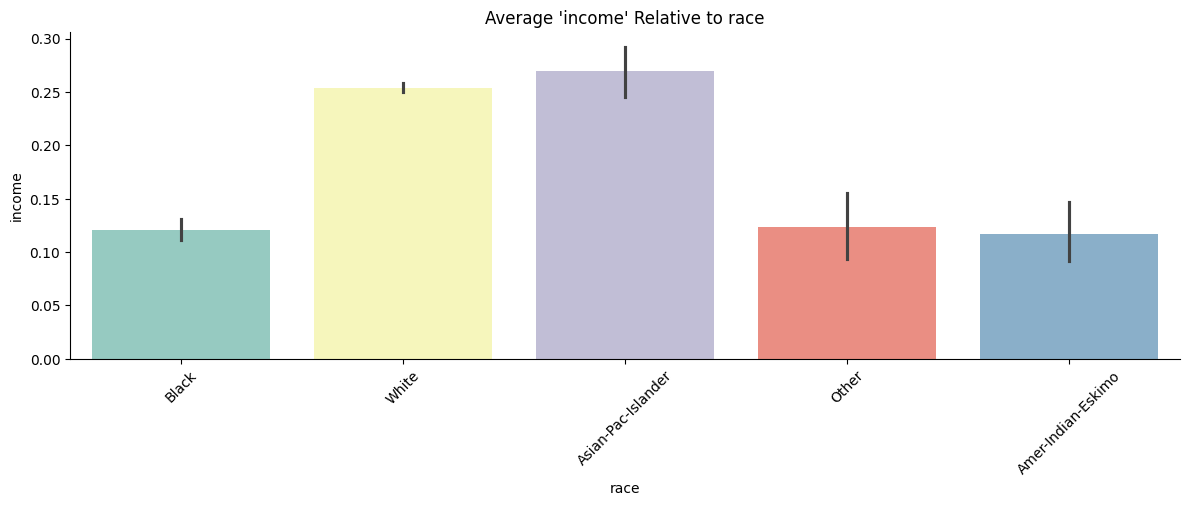

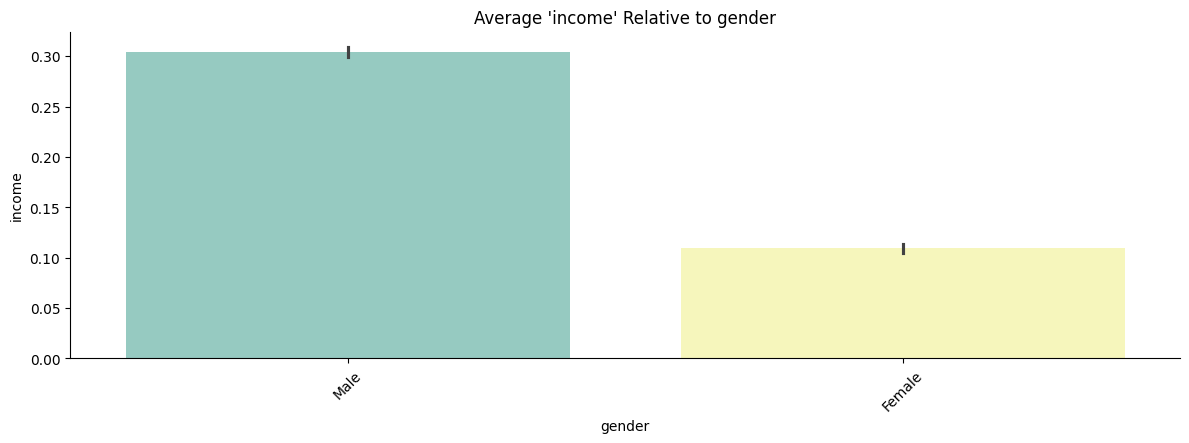

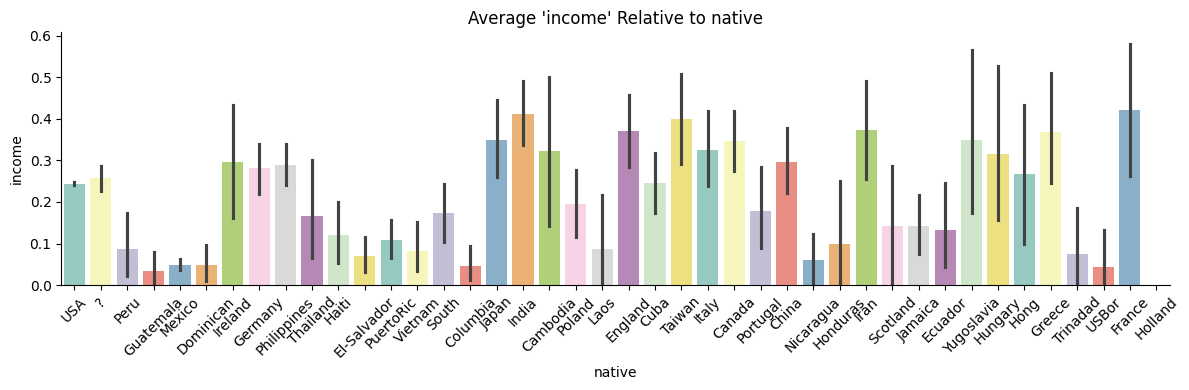

In [103]:
obj_list = obj_cols.columns.to_list()

plt.figure(figsize = (15, 8))

for col in obj_list:
  # plt.subplot(1, len(obj_list), i + 1)
  sns.catplot(x = col, y = 'income', kind = 'bar', dodge = False, height = 4, aspect = 3,
              data = df, palette = 'Set3')
  plt.xticks(rotation = 45)
  plt.title("Average 'income' Relative to {}".format(col))

plt.tight_layout()
plt.show()

Hasil dari Multivariate Analysis pada Categorical Features adalah sebagai berikut.

- Pada workclass, dapat dilihat bahwa semua workclass memiliki income, kecuali tentunya never-worked. Rata-rata yang bekerja pada pemerintah (-gov) memiliki income yang lebih tinggi dibandingkan dengan workclass lain, namun self-emp-inc memiliki pendapatan paling tinggi.

- Pada educationClass, dapat dilihat dengan jelas bahwa terdapat kesenjangan yang sangat tinggi mulai dari tingkat pendidikan S1 (bachelors), dan lebih tinggi lagi semakin tinggi gelar yang dimiliki (masters, doctorate, prof-school).

- Pada status pernikahan, dapat dilihat pula tren bahwa data dengan status pernikahan stabil memiliki pendapatan yang lebih tinggi dibandingkan mereka yang tidak menikah, bercerai, berpisah, atau cerai mati.

- Pada occupation, tiga sektor kerja paling tinggi pendapatannya adalah Specialty (spesialis), manajerial (eksekutif), dan protective service (jasa keamanan). Selain itu, tidak terdapat tren yang secara jelas dapat di diamati.

- Pada relationship, dapat dilihat bahwa menguatkan hasil pengamatan status pernikahan, yang berstatus sebagai husband (suami) dan istri (istri) memiliki pendapatan yang tertinggi dari data-data lain.

- Pada race, dua ras dengan pendapatan tertinggi adalah White (putih) dan Asian-Pac (asia-pasifik).

- Pada gender, dapat dilihat bahwa pendapatan laki-laki lebih tinggi dari pendapatan perempuan.

- pada native (negara asal/buyut), dapat dilihat bahwa tren pendapatan kurang dapat diamati, artinya negara asal/buyut bukan faktor yang kuat yang dapat memengaruhi pendapatan.

Kesimpulannya, dari fitur kategorikal, fitur yang memiliki pengaruh tinggi adalah educationClass, status, dan relationship.

---



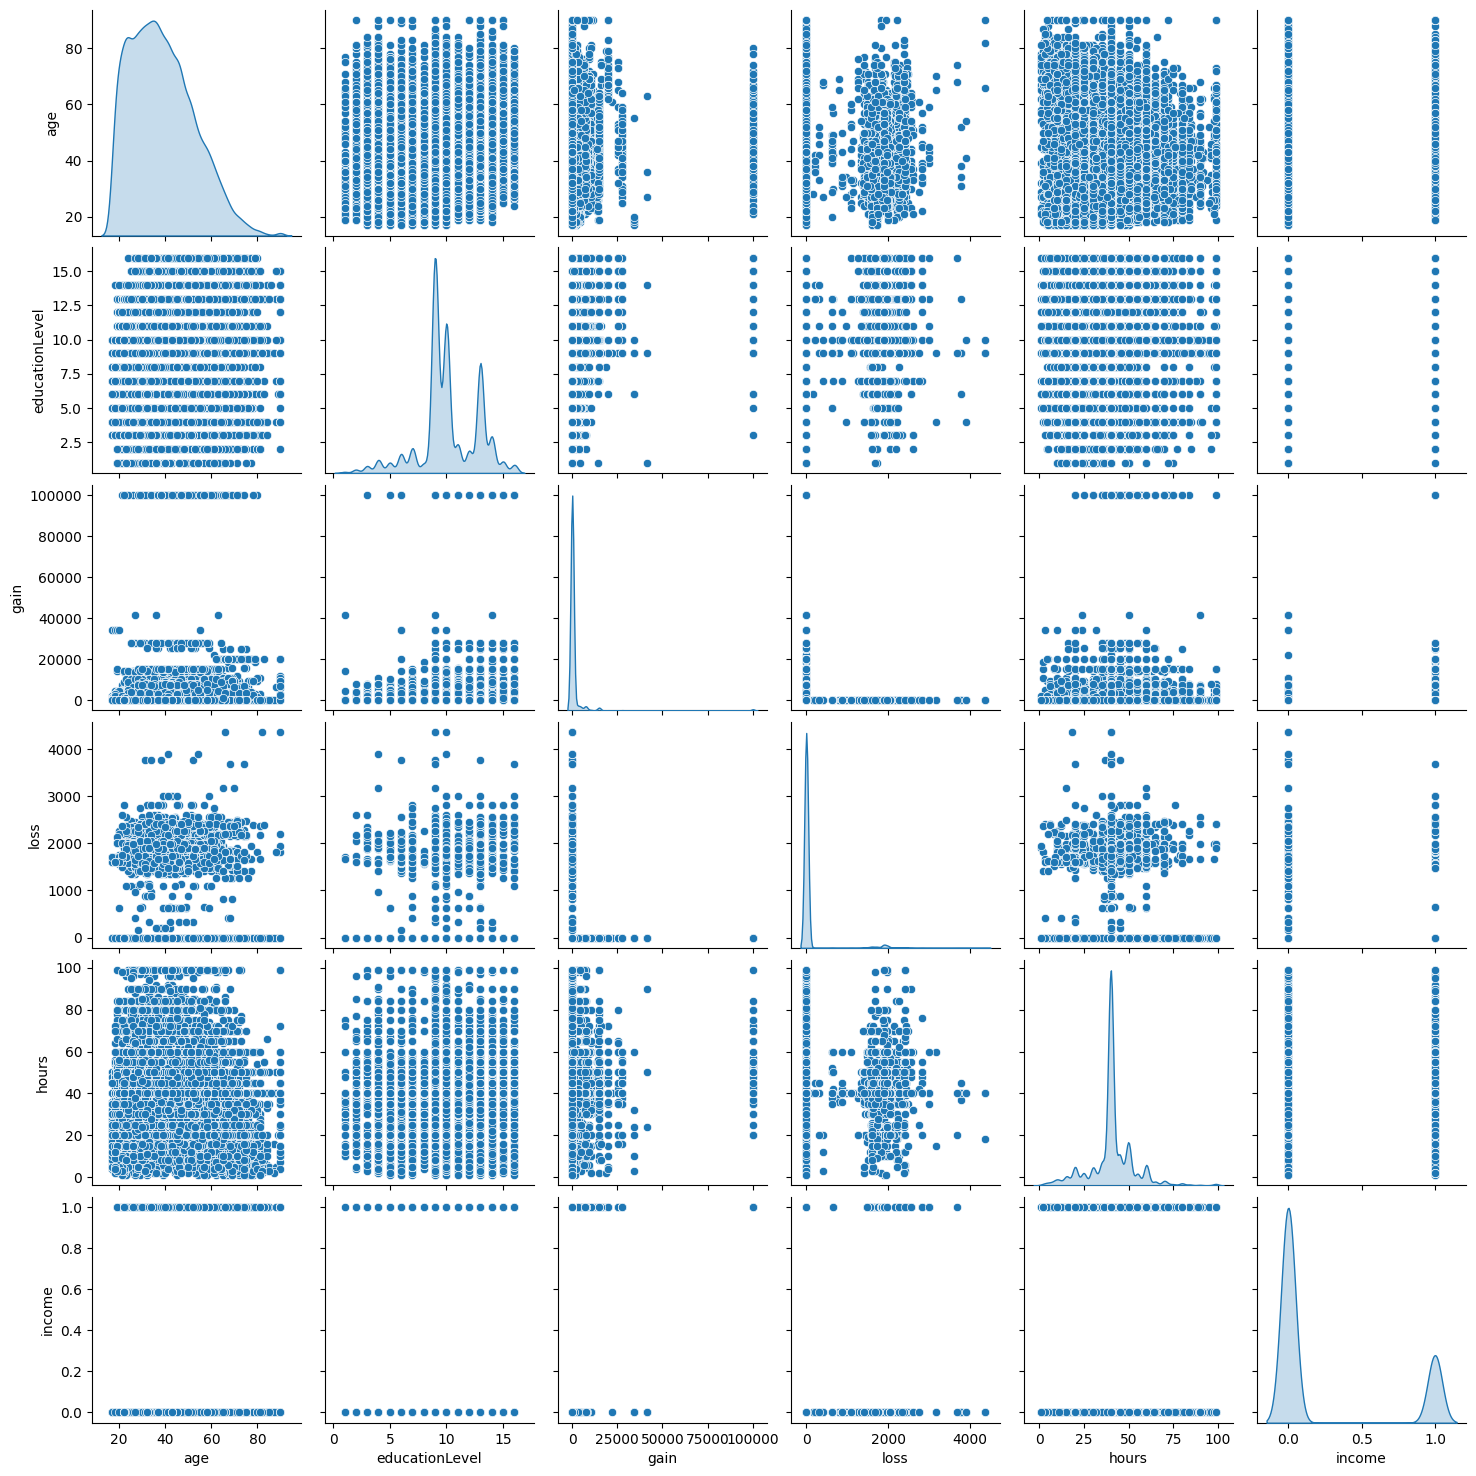

In [104]:
# Numerical Features
sns.pairplot(df, diag_kind = 'kde')

In [105]:
!pip install dython

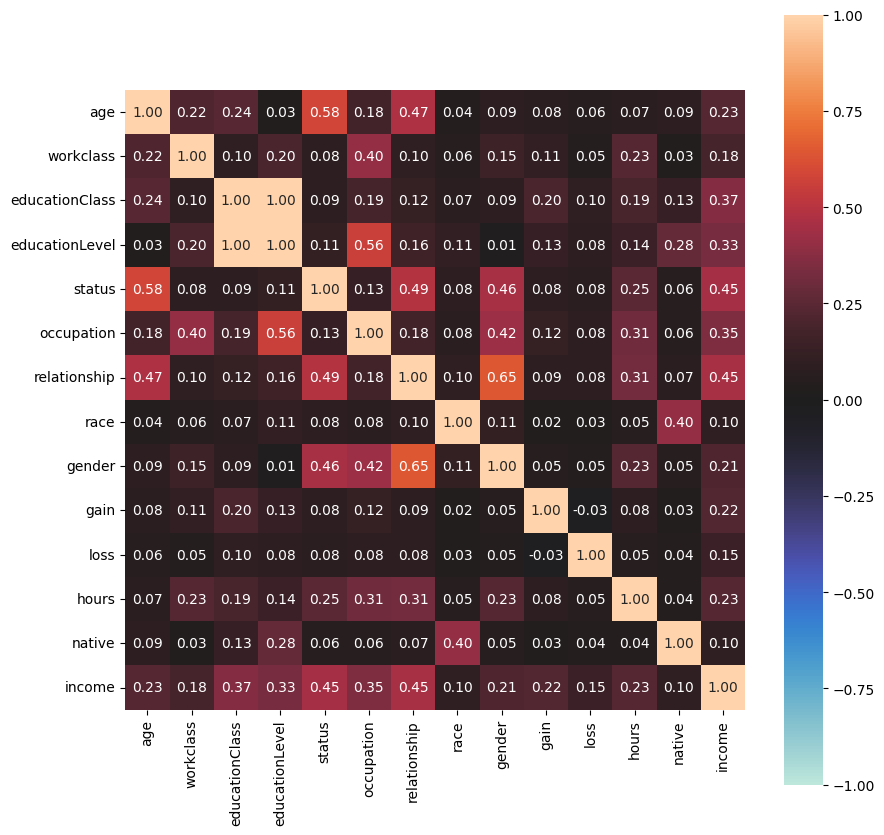

In [106]:
# Correlation Matrix
from dython.nominal import associations

complete_correlation = associations(df, filename='complete_correlation.png', figsize=(10, 10))

df_complete_corr = complete_correlation['corr']
df_complete_corr = df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')


styled_corr_matrix = df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None)

Menguatkan pengamatan dari *Multivariate Analysis* pada fitur kategorikal, dapat dilihat bahwa *status* dan *relationship* memiliki nilai korelasi paling kuat terhadap *income*. Namun dikarenakan *range* antara nilai korelasi paling kuat ke lemah tidak terlalu jauh, tidak ada fitur yang akan di drop.

---



In [107]:
# Drop rows yang memiliki missing values
df_drop = df.loc[(df[['workclass','occupation','native']] != '?').all(axis=1)]
df_drop

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native,income
0,25,Private,11th,7,Never-married,Inspection,Own-child,Black,Male,0,0,40,USA,0
1,38,Private,HS-grad,9,Married-civ-spouse,Agriculture,Husband,White,Male,0,0,50,USA,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,ProtectiveService,Husband,White,Male,0,0,40,USA,1
3,44,Private,Some-college,10,Married-civ-spouse,Inspection,Husband,Black,Male,7688,0,40,USA,1
5,34,Private,10th,6,Never-married,Others,Not-in-family,White,Male,0,0,30,USA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,ITSup,Wife,White,Female,0,0,38,USA,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Inspection,Husband,White,Male,0,0,40,USA,1
48839,58,Private,HS-grad,9,Widowed,Clerical,Unmarried,White,Female,0,0,40,USA,0
48840,22,Private,HS-grad,9,Never-married,Clerical,Own-child,White,Male,0,0,20,USA,0


### ***Data Preparation***

---
Secara berurutan, proses Data Preparation yang akan dilewati adalah
1. Features Encoding
2. Train Test Split
3. KNN Imputation
4. Standardization

Pada tahap Data Preparation ini, akan dilakukan eksplorasi tambahan, antara lain dampak ordinality dan metode missing values handling pada data dan akurasi nantinya. Data yang akan kita tinjau adalah
- Dropped Data:
1. Dropped Dummy Data (One Hot Encoded)
2. Dropped Ordinal Encoded Data (Ordinal Encoded)

- KNN Imputed data:
1. KNN Imputed Ordinal Encoded Data,
dimana, imputasi akan dilakukan setelah proses Train Test Split, untuk mencegah terjadinya Data Leakage.

Pertama-tama, akan dilakukan Features Encoding. Disini akan akan diterapkan One Hot Encoding dan Ordinal Encoding. Hal ini untuk mengamati pengaruh dari metode Encoding yang berbeda pada pengawetan sifat ordinal, yang akan mempengaruhi hasil akhir akurasi model. Sebelum Data Preparation, sudah ada satu dataframe yang merupakan copy dari data asli, dan proses Drop sudah dilakukan. Output dari tahap ini adalah tiga dataframe, yaitu data drop One Hot Encoded, data drop Ordinal encoded dan data asli Ordinal Encoded.

Kedua, akan dilakukan Train Test Split. Disini akan dilakukan proses train test split. 3 dataFrame akan displit menjadi 6, masing-masing x dan y.

Kemudian akan dilakukan KNN Imputation pada data asli Ordinal Encoded. KNN Imputation dilakukan disini karena potensi Data Leakage, sehingga harus dianggap sebagai proses transformasi.

Terakhir, proses Standarisasi dilakukan pada semua x_train dan x_test pada semua dataframe, untuk meningkatkan performa model.

Pentingnya [Standarisasi](https://developers.google.com/machine-learning/data-prep/transform/normalization#:~:text=The%20goal%20of%20normalization%20is,training%20stability%20of%20the%20model)

---



***Dropped Data Preparation***

In [108]:
# import Ordinal Encoding library
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_drop_ordinal = df_drop.copy()
df_drop_dum = df_drop.copy()

# Ordinal Encoded
df_drop_ordinal[obj_cols.columns] = ordinal_encoder.fit_transform(df_drop_ordinal[obj_cols.columns])

# Dummy Encoded
df_drop_dum = pd.get_dummies(df_drop_dum, columns = obj_cols.columns, drop_first = True)

df_drop_ordinal

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native,income
0,25,2.0,1.0,7,4.0,5.0,3.0,2.0,1.0,0,0,40,37.0,0
1,38,2.0,11.0,9,2.0,0.0,0.0,4.0,1.0,0,0,50,37.0,0
2,28,1.0,7.0,12,2.0,9.0,0.0,4.0,1.0,0,0,40,37.0,1
3,44,2.0,15.0,10,2.0,5.0,0.0,2.0,1.0,7688,0,40,37.0,1
5,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2.0,7.0,12,2.0,4.0,5.0,4.0,0.0,0,0,38,37.0,0
48838,40,2.0,11.0,9,2.0,5.0,0.0,4.0,1.0,0,0,40,37.0,1
48839,58,2.0,11.0,9,6.0,3.0,4.0,4.0,0.0,0,0,40,37.0,0
48840,22,2.0,11.0,9,4.0,3.0,3.0,4.0,1.0,0,0,20,37.0,0


In [109]:
df_drop_dum

,age,educationLevel,gain,loss,hours,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_PuertoRic,native_Scotland,native_South,native_Taiwan,native_Thailand,native_Trinadad,native_USA,native_USBor,native_Vietnam,native_Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,12,0,0,40,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,44,10,7688,0,40,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,40,9,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48839,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [110]:
# data asli/initial
df

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native,income
0,25,Private,11th,7,Never-married,Inspection,Own-child,Black,Male,0,0,40,USA,0
1,38,Private,HS-grad,9,Married-civ-spouse,Agriculture,Husband,White,Male,0,0,50,USA,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,ProtectiveService,Husband,White,Male,0,0,40,USA,1
3,44,Private,Some-college,10,Married-civ-spouse,Inspection,Husband,Black,Male,7688,0,40,USA,1
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,USA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,ITSup,Wife,White,Female,0,0,38,USA,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Inspection,Husband,White,Male,0,0,40,USA,1
48839,58,Private,HS-grad,9,Widowed,Clerical,Unmarried,White,Female,0,0,40,USA,0
48840,22,Private,HS-grad,9,Never-married,Clerical,Own-child,White,Male,0,0,20,USA,0


In [111]:
ordinal_encoder = OrdinalEncoder()
df.replace('?', np.nan, inplace = True)

df[obj_cols.columns] = ordinal_encoder.fit_transform(df[obj_cols.columns])

df.isna().sum()

age                  0
workclass         2799
educationClass       0
educationLevel       0
status               0
occupation        2809
relationship         0
race                 0
gender               0
gain                 0
loss                 0
hours                0
native             857
income               0
dtype: int64

In [112]:
# train test split
from sklearn.model_selection import train_test_split

# Dropped Dummy Encoded data
x_drop_dum = df_drop_dum.drop(['income'], axis = 1)
y_drop_dum = df_drop_dum['income']

# Dropped Ordinal Encoded data
x_drop_ordinal = df_drop_ordinal.drop(['income'], axis = 1)
y_drop_ordinal = df_drop_ordinal['income']

# Original data, to be KNN Imputed
x_kimp = df.drop(['income'], axis = 1)
y_kimp = df['income']

# train test split
x_train_dd, x_test_dd, y_train_dd, y_test_dd = train_test_split(x_drop_dum, y_drop_dum, test_size = 0.1, random_state = 123)
x_train_do, x_test_do, y_train_do, y_test_do = train_test_split(x_drop_ordinal, y_drop_ordinal, test_size = 0.1, random_state = 123)
x_train_kimp, x_test_kimp, y_train_kimp, y_test_kimp = train_test_split(x_kimp, y_kimp, test_size = 0.1, random_state = 123)

# print results
print(f"Total sample in dataset (dum): {len(x_drop_dum)}")
print(f"Total sample in dataset (do): {len(x_drop_ordinal)}")
print(f"Total sample in dataset (kimp): {len(x_kimp)}")
print(f"Total train samples (dum): {len(x_train_dd)}")
print(f"Total train samples (do): {len(x_train_do)}")
print(f"Total train samples (kimp): {len(x_train_kimp)}")
print(f"Total test samples (do): {len(x_test_do)}")
print(f"Total test samples (dum): {len(x_test_dd)}")
print(f"Total test samples (kimp): {len(x_test_kimp)}")

Total sample in dataset (dum): 45222
Total sample in dataset (do): 45222
Total sample in dataset (kimp): 48842
Total train samples (dum): 40699
Total train samples (do): 40699
Total train samples (kimp): 43957
Total test samples (do): 4523
Total test samples (dum): 4523
Total test samples (kimp): 4885


***KNN Imputation Data Preparation***

---

KNN Imputation dilakukan pada proses Data Preparation, setelah train test split, dikarenakan metode ini memiliki potensi Data Leakage, sehingga perlu dianggap sebagai tahap transformasi. Sama seperti proses Data Preparation pada Dropped Data, akan dilakukan Features Encoding terlebih dahulu, dilanjutkan ke standarisasi.



In [113]:
# check initial train missing values
missing_values_check1 = x_train_kimp.columns[x_train_kimp.eq(np.nan).any()]

print(missing_values_check1)

Index([], dtype='object')


In [114]:
# check initial test missing values
missing_values_check2 = x_test_kimp.columns[x_test_kimp.eq(np.nan).any()]

print(missing_values_check2)

Index([], dtype='object')


In [115]:
from sklearn.impute import KNNImputer

# ordinal_encoder = OrdinalEncoder()
# x_train_kimp.replace('?', np.nan, inplace = True)

# x_train_kimp[obj_cols.columns] = ordinal_encoder.fit_transform(x_train_kimp[obj_cols.columns])

imputer = KNNImputer(n_neighbors = 6)

x_train_kimp_imputed = imputer.fit_transform(x_train_kimp)
x_train_kimp_imputed= pd.DataFrame(x_train_kimp_imputed, columns = x_train_kimp.columns)

x_train_kimp_imputed

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native
0,35.0,4.0,14.0,15.0,2.0,12.0,0.0,4.0,1.0,0.0,0.0,50.0,37.0
1,44.0,1.0,11.0,9.0,2.0,5.0,0.0,4.0,1.0,0.0,0.0,40.0,37.0
2,28.0,3.0,9.0,13.0,4.0,11.0,4.0,4.0,1.0,0.0,0.0,65.0,37.0
3,54.0,3.0,9.0,13.0,2.0,12.0,0.0,4.0,1.0,0.0,1977.0,40.0,37.0
4,35.0,3.0,6.0,5.0,0.0,10.0,1.0,4.0,1.0,0.0,0.0,45.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,42.0,0.0,9.0,13.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,40.0,37.0
43953,65.0,5.0,11.0,9.0,2.0,11.0,5.0,4.0,0.0,0.0,0.0,40.0,37.0
43954,44.0,4.0,15.0,10.0,2.0,6.0,0.0,4.0,1.0,0.0,0.0,50.0,37.0
43955,35.0,3.0,9.0,13.0,4.0,2.0,1.0,2.0,1.0,0.0,0.0,40.0,37.0


In [116]:
x_train_kimp_imputed.isna().sum()

age               0
workclass         0
educationClass    0
educationLevel    0
status            0
occupation        0
relationship      0
race              0
gender            0
gain              0
loss              0
hours             0
native            0
dtype: int64

In [117]:
missing_values_check_after = x_train_kimp_imputed.columns[x_train_kimp_imputed.eq('?').any()]

print(f"after - columns with missing values: {missing_values_check_after}")

after - columns with missing values: Index([], dtype='object')


Seperti yang terlihat, data train sudah berhasil di imputasi.

---



In [118]:
# x_test_kimp.replace('?', np.nan, inplace = True)

# x_test_kimp[obj_cols.columns] = ordinal_encoder.fit_transform(x_test_kimp[obj_cols.columns])

imputer = KNNImputer(n_neighbors = 6)

x_test_kimp_imputed = imputer.fit_transform(x_test_kimp)
x_test_kimp_imputed= pd.DataFrame(x_test_kimp_imputed, columns = x_test_kimp.columns)

x_test_kimp_imputed

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native
0,52.0,3.0,11.0,9.0,0.0,3.0,1.0,4.0,0.0,0.0,0.0,40.0,37.0
1,19.0,3.0,0.0,6.0,4.0,7.0,4.0,4.0,1.0,0.0,0.0,30.0,7.0
2,31.0,0.0,11.0,9.0,4.0,2.0,3.0,4.0,0.0,0.0,0.0,40.0,37.0
3,25.0,3.0,9.0,13.0,4.0,11.0,1.0,4.0,0.0,0.0,0.0,40.0,37.0
4,36.0,3.0,5.0,4.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,35.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,30.0,3.0,8.0,11.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,40.0,37.0
4881,24.0,3.0,11.0,9.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,40.0,37.0
4882,54.0,3.0,11.0,9.0,2.0,7.0,5.0,2.0,0.0,0.0,0.0,40.0,37.0
4883,67.0,5.0,11.0,9.0,6.0,7.0,1.0,4.0,0.0,0.0,0.0,20.0,37.0


In [119]:
x_test_kimp_imputed.isna().sum()

age               0
workclass         0
educationClass    0
educationLevel    0
status            0
occupation        0
relationship      0
race              0
gender            0
gain              0
loss              0
hours             0
native            0
dtype: int64

Sama halnya dengan data train, data test sudah berhasil di imputasi.

---



In [120]:
x_train_do

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native
27335,19,2.0,15.0,10,4.0,13.0,3.0,4.0,1.0,0,0,40,37.0
17975,44,2.0,15.0,10,2.0,11.0,0.0,4.0,1.0,0,0,50,37.0
23163,35,2.0,11.0,9,5.0,3.0,4.0,4.0,0.0,0,0,32,37.0
36220,22,2.0,8.0,11,2.0,5.0,0.0,4.0,1.0,0,0,40,37.0
14962,66,2.0,11.0,9,2.0,11.0,0.0,4.0,1.0,0,0,40,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,37,4.0,0.0,6,2.0,10.0,0.0,4.0,1.0,0,0,40,25.0
16622,38,2.0,8.0,11,2.0,10.0,0.0,4.0,1.0,7298,0,40,37.0
19188,33,1.0,11.0,9,0.0,3.0,3.0,4.0,0.0,0,1138,40,37.0
30288,29,2.0,15.0,10,4.0,0.0,3.0,4.0,1.0,0,0,40,37.0


***Standarisasi***

---



In [121]:
# Standardization for dummy dataset
from sklearn.preprocessing import StandardScaler

numerical_values_dum = ['age', 'educationLevel', 'gain', 'loss', 'hours']
scaler = StandardScaler()
scaler.fit(x_train_dd[numerical_values_dum])
x_train_dd[numerical_values_dum] = scaler.transform(x_train_dd.loc[:, numerical_values_dum])
x_train_dd[numerical_values_dum].head()

,age,educationLevel,gain,loss,hours
27335,-1.481009,-0.050173,-0.146231,-0.218988,-0.078475
17975,0.413651,-0.050173,-0.146231,-0.218988,0.754798
23163,-0.268426,-0.442336,-0.146231,-0.218988,-0.745094
36220,-1.253650,0.341990,-0.146231,-0.218988,-0.078475
14962,2.080952,-0.442336,-0.146231,-0.218988,-0.078475


In [122]:
# Standardize dummy dataset test set

x_test_dd.loc[:, numerical_values_dum] = scaler.transform(x_test_dd[numerical_values_dum])
x_test_dd

,age,educationLevel,gain,loss,hours,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native_PuertoRic,native_Scotland,native_South,native_Taiwan,native_Thailand,native_Trinadad,native_USA,native_USBor,native_Vietnam,native_Yugoslavia
18656,-1.405222,-0.442336,-0.146231,-0.218988,-0.078475,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5919,-0.571572,1.126316,-0.146231,-0.218988,-0.078475,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1728,1.095729,0.734153,-0.146231,-0.218988,0.338162,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
37326,-0.192640,1.518479,-0.146231,-0.218988,2.421345,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
18002,0.944156,-0.442336,-0.146231,-0.218988,2.421345,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44093,-0.798931,-0.050173,-0.146231,-0.218988,-1.245057,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
33307,-0.192640,-0.442336,-0.146231,-0.218988,-0.078475,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31319,-1.481009,-0.050173,-0.146231,-0.218988,-2.078331,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29043,2.005166,1.126316,-0.146231,-0.218988,-0.078475,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# Standardize ordinal-encoded data

numerical_values_ord = x_train_do.select_dtypes(include = ['number']).columns # ['age'	, 'workclass',	'educationClass',	'educationLevel',	'status', 'occupation',	'relationship',	'race',	'gender',	'gain', 'loss', 'hours',	'native']
scaler = StandardScaler()
scaler.fit(x_train_do[numerical_values_ord])
x_train_do[numerical_values_ord] = scaler.transform(x_train_do.loc[:, numerical_values_ord])
x_train_do[numerical_values_ord].head()

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native
27335,-1.481009,-0.213525,1.226788,-0.050173,0.940424,1.476443,0.994397,0.38279,0.694854,-0.146231,-0.218988,-0.078475,0.259612
17975,0.413651,-0.213525,1.226788,-0.050173,-0.390903,0.929747,-0.884536,0.38279,0.694854,-0.146231,-0.218988,0.754798,0.259612
23163,-0.268426,-0.213525,0.178679,-0.442336,1.606087,-1.257034,1.620708,0.38279,-1.439152,-0.146231,-0.218988,-0.745094,0.259612
36220,-1.253650,-0.213525,-0.607403,0.341990,-0.390903,-0.710339,-0.884536,0.38279,0.694854,-0.146231,-0.218988,-0.078475,0.259612
14962,2.080952,-0.213525,0.178679,-0.442336,-0.390903,0.929747,-0.884536,0.38279,0.694854,-0.146231,-0.218988,-0.078475,0.259612


In [124]:
# Standardize ordinal-encoded test set

x_test_do.loc[:, numerical_values_ord] = scaler.transform(x_test_do[numerical_values_ord])
x_test_do

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native
18656,-1.405222,-0.213525,0.178679,-0.442336,-1.722229,0.929747,-0.258225,-2.024559,-1.439152,-0.146231,-0.218988,-0.078475,0.259612
5919,-0.571572,-0.213525,-0.345376,1.126316,0.940424,1.203095,-0.258225,0.382790,-1.439152,-0.146231,-0.218988,-0.078475,0.259612
1728,1.095729,-0.213525,-0.869431,0.734153,-0.390903,-0.436991,-0.884536,0.382790,0.694854,-0.146231,-0.218988,0.338162,0.259612
37326,-0.192640,1.873972,0.440706,1.518479,-0.390903,-2.077077,-0.884536,0.382790,0.694854,-0.146231,-0.218988,2.421345,0.259612
18002,0.944156,-1.257274,0.178679,-0.442336,-0.390903,0.383052,-0.884536,0.382790,0.694854,-0.146231,-0.218988,2.421345,0.259612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44093,-0.798931,-0.213525,1.226788,-0.050173,0.940424,-1.257034,0.994397,0.382790,-1.439152,-0.146231,-0.218988,-1.245057,0.259612
33307,-0.192640,-0.213525,0.178679,-0.442336,-1.722229,0.656400,0.994397,0.382790,0.694854,-0.146231,-0.218988,-0.078475,0.259612
31319,-1.481009,-0.213525,1.226788,-0.050173,0.940424,-1.257034,0.994397,0.382790,-1.439152,-0.146231,-0.218988,-2.078331,0.259612
29043,2.005166,-0.213525,-0.345376,1.126316,-0.390903,0.656400,-0.884536,0.382790,0.694854,-0.146231,-0.218988,-0.078475,-4.702128


In [125]:
# Standardize KNN Imputed train data

numerical_values_kimp = x_train_kimp_imputed.select_dtypes(include = ['number']).columns # ['age'	, 'workclass',	'educationClass',	'educationLevel',	'status', 'occupation',	'relationship',	'race',	'gender',	'gain', 'loss', 'hours',	'native']
scaler = StandardScaler()
scaler.fit(x_train_kimp_imputed[numerical_values_ord])
x_train_kimp_imputed[numerical_values_kimp] = scaler.transform(x_train_kimp_imputed.loc[:, numerical_values_kimp])
x_train_kimp_imputed[numerical_values_kimp].head()

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native
0,-0.264451,0.795369,0.959622,1.915738,-0.410941,1.238493,-0.901168,0.392978,0.704057,-0.144851,-0.215979,0.778181,0.263108
1,0.393637,-1.889601,0.184401,-0.417404,-0.410941,-0.718442,-0.901168,0.392978,0.704057,-0.144851,-0.215979,-0.030235,0.263108
2,-0.776298,-0.099621,-0.332413,1.138024,0.915033,0.958931,1.593881,0.392978,0.704057,-0.144851,-0.215979,1.990806,0.263108
3,1.124847,-0.099621,-0.332413,1.138024,-0.410941,1.238493,-0.901168,0.392978,0.704057,-0.144851,4.701385,-0.030235,0.263108
4,-0.264451,-0.099621,-1.107634,-1.972832,-1.736916,0.679369,-0.277406,0.392978,0.704057,-0.144851,-0.215979,0.373973,0.263108


In [126]:
# Standardize test data

x_test_kimp_imputed.loc[:, numerical_values_kimp] = scaler.transform(x_test_kimp_imputed[numerical_values_kimp])
x_test_kimp_imputed

,age,workclass,educationClass,educationLevel,status,occupation,relationship,race,gender,gain,loss,hours,native
0,0.978605,-0.099621,0.184401,-0.417404,-1.736916,-1.277566,-0.277406,0.392978,-1.420340,-0.144851,-0.215979,-0.030235,0.263108
1,-1.434386,-0.099621,-2.658076,-1.583975,0.915033,-0.159318,1.593881,0.392978,0.704057,-0.144851,-0.215979,-0.838651,-4.890379
2,-0.556935,-2.784590,0.184401,-0.417404,0.915033,-1.557128,0.970119,0.392978,-1.420340,-0.144851,-0.215979,-0.030235,0.263108
3,-0.995661,-0.099621,-0.332413,1.138024,0.915033,0.958931,-0.277406,0.392978,-1.420340,-0.144851,-0.215979,-0.030235,0.263108
4,-0.191330,-0.099621,-1.366041,-2.361689,-0.410941,-2.116252,-0.901168,0.392978,0.704057,-0.144851,-0.215979,-0.434443,-1.798286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,-0.630056,-0.099621,-0.590820,0.360310,-0.410941,0.679369,-0.901168,0.392978,0.704057,-0.144851,-0.215979,-0.030235,0.263108
4881,-1.068782,-0.099621,0.184401,-0.417404,-0.410941,0.679369,-0.901168,0.392978,0.704057,-0.144851,-0.215979,-0.030235,0.263108
4882,1.124847,-0.099621,0.184401,-0.417404,-0.410941,-0.159318,2.217643,-1.972530,-1.420340,-0.144851,-0.215979,-0.030235,0.263108
4883,2.075419,1.690359,0.184401,-0.417404,2.241008,-0.159318,-0.277406,0.392978,-1.420340,-0.144851,-0.215979,-1.647067,0.263108


In [127]:
print(x_train_kimp_imputed.shape)
print(x_test_kimp_imputed.shape)

(43957, 13)
(4885, 13)


Dengan ini, data sudah siap digunakan model.

### ***Model Development***

---

Proses Model Development yang akan Penulis lakukan dapat dibagi menjadi beberapa tahap:
1. DataFrame initialization: menyiapkan dataframe untuk menyimpan hasil training model.

2. Pipeline Prep: menyiapkan pipeline untuk mempermudah proses training.

3. Model Training: melatih model.

4. Visualization


***DataFrame Initialization***


---





In [128]:
# initialize dataframe for models

# dataframe for Dropped - OneHotEncoded data
models_dum = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for Dropped - OrdinalEncoded data
models_ord = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for KNN Imputed data
models_kimp = pd.DataFrame(
    columns = ['train_acc', 'train_precision', 'train_recall', 'train_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

print(models_dum)
print(models_ord)
print(models_kimp)

             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN
             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN
             train_acc train_precision train_recall train_f1Score
KNN                NaN             NaN          NaN           NaN
RandomForest       NaN             NaN          NaN           NaN
XGBoost            NaN             NaN          NaN           NaN
AdaBoost           NaN             NaN          NaN           NaN


***Training Pipeline Prep***

---



In [129]:
# pipelines

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# pipeline train function
def train(classifier, x_train, y_train, model_name, models_df):
  classifier.fit(x_train, y_train)

  pred_train = classifier.predict(x_train)

  acc_train = accuracy_score(y_true = y_train, y_pred = pred_train)
  precision_train = precision_score(y_true = y_train, y_pred = pred_train)
  recall_train = recall_score(y_true = y_train, y_pred = pred_train)
  f1score_train = f1_score(y_true = y_train, y_pred = pred_train)

  models_df.loc[model_name, 'train_acc'] = acc_train
  models_df.loc[model_name, 'train_precision'] = precision_train
  models_df.loc[model_name, 'train_recall'] = recall_train
  models_df.loc[model_name, 'train_f1Score'] = f1score_train

  return models_df

***Model Training***

---



In [130]:
# model training
forest = RandomForestClassifier(n_estimators = 50, max_depth = 16, random_state = 55, n_jobs = -1)
models_dum = train(forest, x_train_dd, y_train_dd, 'RandomForest', models_dum)
models_ord = train(forest, x_train_do, y_train_do, 'RandomForest', models_ord)
models_kimp = train(forest, x_train_kimp_imputed, y_train_kimp, 'RandomForest', models_kimp)

knn = KNeighborsClassifier(n_neighbors = 10)
models_dum = train(knn, x_train_dd, y_train_dd, 'KNN', models_dum)
models_ord = train(knn, x_train_do, y_train_do, 'KNN', models_ord)
models_kimp = train(knn, x_train_kimp_imputed, y_train_kimp, 'KNN', models_kimp)

xgb = XGBClassifier()
models_dum = train(xgb, x_train_dd, y_train_dd, 'XGBoost', models_dum)
models_ord = train(xgb, x_train_do, y_train_do, 'XGBoost', models_ord)
models_kimp = train(xgb, x_train_kimp_imputed, y_train_kimp, 'XGBoost', models_kimp)

ada = AdaBoostClassifier(n_estimators = 50, random_state = 123)
models_dum = train(ada, x_train_dd, y_train_dd, 'AdaBoost', models_dum)
models_ord = train(ada, x_train_do, y_train_do, 'AdaBoost', models_ord)
models_kimp = train(ada, x_train_kimp_imputed, y_train_kimp, 'AdaBoost', models_kimp)

***Model Explanation, pros and cons***

---

*dijelaskan di laporan proyek lengkap (.md)

In [131]:
models_dum

,train_acc,train_precision,train_recall,train_f1Score
KNN,0.864862,0.794974,0.612125,0.691669
RandomForest,0.879334,0.842685,0.630383,0.721235
XGBoost,0.88582,0.821095,0.689026,0.749285
AdaBoost,0.858154,0.770313,0.608653,0.680007


In [132]:
models_ord

,train_acc,train_precision,train_recall,train_f1Score
KNN,0.860586,0.788522,0.597142,0.679616
RandomForest,0.897344,0.868198,0.690216,0.769044
XGBoost,0.887958,0.824283,0.695872,0.754654
AdaBoost,0.855402,0.767718,0.596547,0.671394


In [133]:
models_kimp

,train_acc,train_precision,train_recall,train_f1Score
KNN,0.86439,0.787813,0.590597,0.675097
RandomForest,0.900698,0.859763,0.697501,0.770178
XGBoost,0.893032,0.825309,0.699695,0.757329
AdaBoost,0.859795,0.774685,0.581347,0.664233


***Visualization***

---



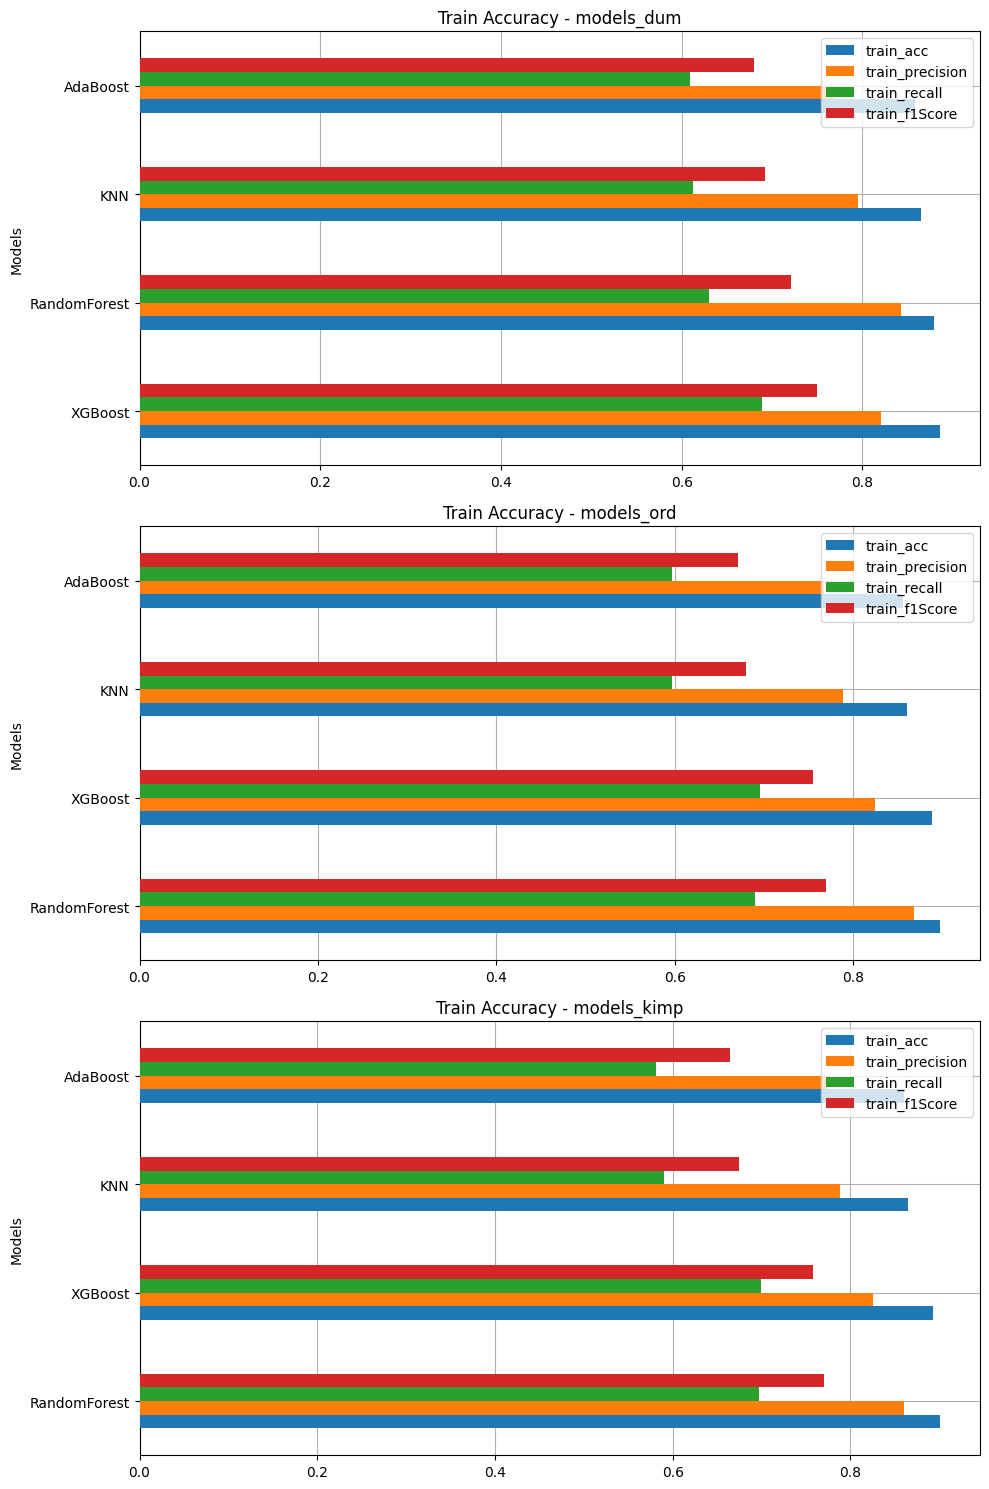

In [134]:
fig, ax = plt.subplots(nrows = 3, figsize = (10, 15))

models_dum.sort_values(by = 'train_acc', ascending = False).plot(kind = 'barh', ax = ax[0], zorder = 3)
ax[0].set_ylabel('Models')
ax[0].set_title('Train Accuracy - models_dum')
ax[0].grid(zorder = 0)

models_ord.sort_values(by = 'train_acc', ascending = False).plot(kind = 'barh', ax = ax[1], zorder = 3)
ax[1].set_ylabel('Models')
ax[1].set_title('Train Accuracy - models_ord')
ax[1].grid(zorder = 0)

models_kimp.sort_values(by = 'train_acc', ascending = False).plot(kind = 'barh', ax = ax[2], zorder = 3)
ax[2].set_ylabel('Models')
ax[2].set_title('Train Accuracy - models_kimp')
ax[2].grid(zorder = 0)

plt.tight_layout()
plt.show()

Dilihat dari hasil di atas, dapat disimpulkan bahwa ordinalitas data penting (jika ada) untuk disimpan menggunakan Ordinal Encoding atau sejenisnya. Sejauh ini, hasil yang paling baik adalah Random Forest pada data KNN Imputed Ordinal Encoded. Namun untuk evaluasinya tetap akan sama seperti training, hanya saja menggunakan test data.

### ***Evaluation***

---

Dalam proyek ini, beberapa metrik evaluasi yang digunakan adalah sebagai berikut.

Sebelum memasuki penjelasan metrik lebih lanjut, perlu dipahami bahwa:

- TN = True Negative, data negatif yang diprediksi negatif (benar)
- TP = True Positive, data positif yang diprediksi negatif (benar)
- FN = False Negative, data negatif yang diprediksi positif (salah)
- FP = False positive, data positif yang diprediksi negatif (salah)



---


Pertama, Accuracy, yang dapat dihitung dengan rumus:
$$
Accuracy = \frac{TN + TP}{TN + FP + TP + FN}
$$

Accuracy merepresentasikan angka data yang benar di prediksi dibagi total jumlah data. Idealnya, akurasi memberikan ide seberapa baik model dapat memprediksi data, namun kekurangan dari metrik ini adalah kurang adilnya metrik jika dataset yang digunakan *unbalanced*.


---


Berikutnya adalah precision, yang dapat dihitung dengan rumus:

$$
Precision = \frac{TP}{FP + TP}
$$

Precision adalah rasio prediksi benar positif (TP) dari total prediksi positif. Semakin tinggi presisi, artinya semakin sedikit jumlah prediksi positif salah (FP).


---


Kemudian terdapat metrik Recall, seperti berikut.

$$
Recall = \frac{TP}{TP + FN}
$$

Recall menghitung nilai dari betulnya prediksi positif dari jumlah aktual positif. Semakin tinggi nilai recall berarti semakin sedikit False Negatives (FN).



---


Setelah menghitung metrik Accuracy, Precision, dan Recall, kita bisa mencari nilai F1 Score dengan rumus berikut.

$$
F1 Score = 2* \frac{Precision * Recall}{Precision + Recall}
$$

F1 Score adalah sebuah nilai harmonis yang menggunkan presisi dan Recall, artinya  nilai F1 Score yang tinggi memiliki Precision dan Recall yang tinggi.

***Initialize DataFrame and Pipeline for Testing***

---






In [135]:
# dataframe for Dropped - OneHotEncoded data
test_dum = pd.DataFrame(
    columns = ['test_acc', 'test_precision', 'test_recall', 'test_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for Dropped - OrdinalEncoded data
test_ord = pd.DataFrame(
    columns = ['test_acc', 'test_precision', 'test_recall', 'test_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])

# dataframe for KNN Imputed data
test_kimp = pd.DataFrame(
    columns = ['test_acc', 'test_precision', 'test_recall', 'test_f1Score'],
    index = ['KNN', 'RandomForest', 'XGBoost', 'AdaBoost'])


# pipeline test function
def test(classifier, x_test, y_test, model_name, models_df):
  classifier.fit(x_test, y_test)

  pred_test = classifier.predict(x_test)

  acc_test = accuracy_score(y_true = y_test, y_pred = pred_test)
  precision_test = precision_score(y_true = y_test, y_pred = pred_test)
  recall_test = recall_score(y_true = y_test, y_pred = pred_test)
  f1score_test = f1_score(y_true = y_test, y_pred = pred_test)

  models_df.loc[model_name, 'test_acc'] = acc_test
  models_df.loc[model_name, 'test_precision'] = precision_test
  models_df.loc[model_name, 'test_recall'] = recall_test
  models_df.loc[model_name, 'test_f1Score'] = f1score_test

  return pred_test, models_df

***Model Testing***

---



In [136]:
# model testing

# Random Forest Test
forrest_test_dum, test_dum = test(forest, x_test_dd, y_test_dd, 'RandomForest', test_dum)
forrest_test_ord, test_ord = test(forest, x_test_do, y_test_do, 'RandomForest', test_ord)
forrest_test_kimp, test_kimp = test(forest, x_test_kimp_imputed, y_test_kimp, 'RandomForest', test_kimp)

# KNN Test
knn_test_dum, test_dum = test(knn, x_test_dd, y_test_dd, 'KNN', test_dum)
knn_test_ord, test_ord = test(knn, x_test_do, y_test_do, 'KNN', test_ord)
knn_test_kimp, test_kimp = test(knn, x_test_kimp_imputed, y_test_kimp, 'KNN', test_kimp)

# XGBoost Test
xgb_test_dum, test_dum = test(xgb, x_test_dd, y_test_dd, 'XGBoost', test_dum)
xgb_test_ord, test_ord = test(xgb, x_test_do, y_test_do, 'XGBoost', test_ord)
xgb_test_kimp, test_kimp = test(xgb, x_test_kimp_imputed, y_test_kimp, 'XGBoost', test_kimp)

# AdaBoost Test
ada_test_dum, test_dum = test(ada, x_test_dd, y_test_dd, 'AdaBoost', test_dum)
ada_test_ord, test_ord = test(ada, x_test_do, y_test_do, 'AdaBoost', test_ord)
ada_test_kimp, test_kimp = test(ada, x_test_kimp_imputed, y_test_kimp, 'AdaBoost', test_kimp)

test_dum

,test_acc,test_precision,test_recall,test_f1Score
KNN,0.858943,0.770925,0.619469,0.686948
RandomForest,0.927703,0.925769,0.772566,0.842258
XGBoost,0.940084,0.909438,0.844248,0.875631
AdaBoost,0.86845,0.772126,0.671681,0.71841


In [137]:
test_ord

,test_acc,test_precision,test_recall,test_f1Score
KNN,0.853637,0.775943,0.582301,0.665319
RandomForest,0.954455,0.93097,0.883186,0.906449
XGBoost,0.944948,0.906741,0.869027,0.887483
AdaBoost,0.860491,0.759086,0.646903,0.698519


In [138]:
test_kimp

,test_acc,test_precision,test_recall,test_f1Score
KNN,0.845445,0.764218,0.537052,0.630807
RandomForest,0.951894,0.928191,0.871774,0.899098
XGBoost,0.94002,0.897548,0.853455,0.874947
AdaBoost,0.854657,0.752312,0.609492,0.673413


Melihat hasil dari hasil test diatas, terutama dari test_dum dan test_ord, dapat dilihat bahwa terjadi peningkatan akurasi dari dua model dengan akurasi tertinggi, yaitu Random Forest dan XGBoost. Hal ini membenarkan bahwa penting untuk menyimpan fitur ordinality (jika ada) yang dalam hal ini ada pada dataset, terutama educationClass.


Secara konsisten, model Random Forest dan XGBoost menghasilkan akurasi dan F1 Score yang tinggi, sebuah indikasi dari model yang unggul.


Pengujian prediksi terakhir akan menggunakan test data dari test_ord, dikarenakan dataset ini mengimplementasikan Ordinal Encoding dan memiliki tingkat integritas yang lebih tinggi dari dataset imputasi. Mengingat bahwa jumlah dataset ini melimpah dari awal, metode Drop tetap menjadi metode Data Handling terbaik karena pengawetan integritasnya.




***Test Visualization***


---





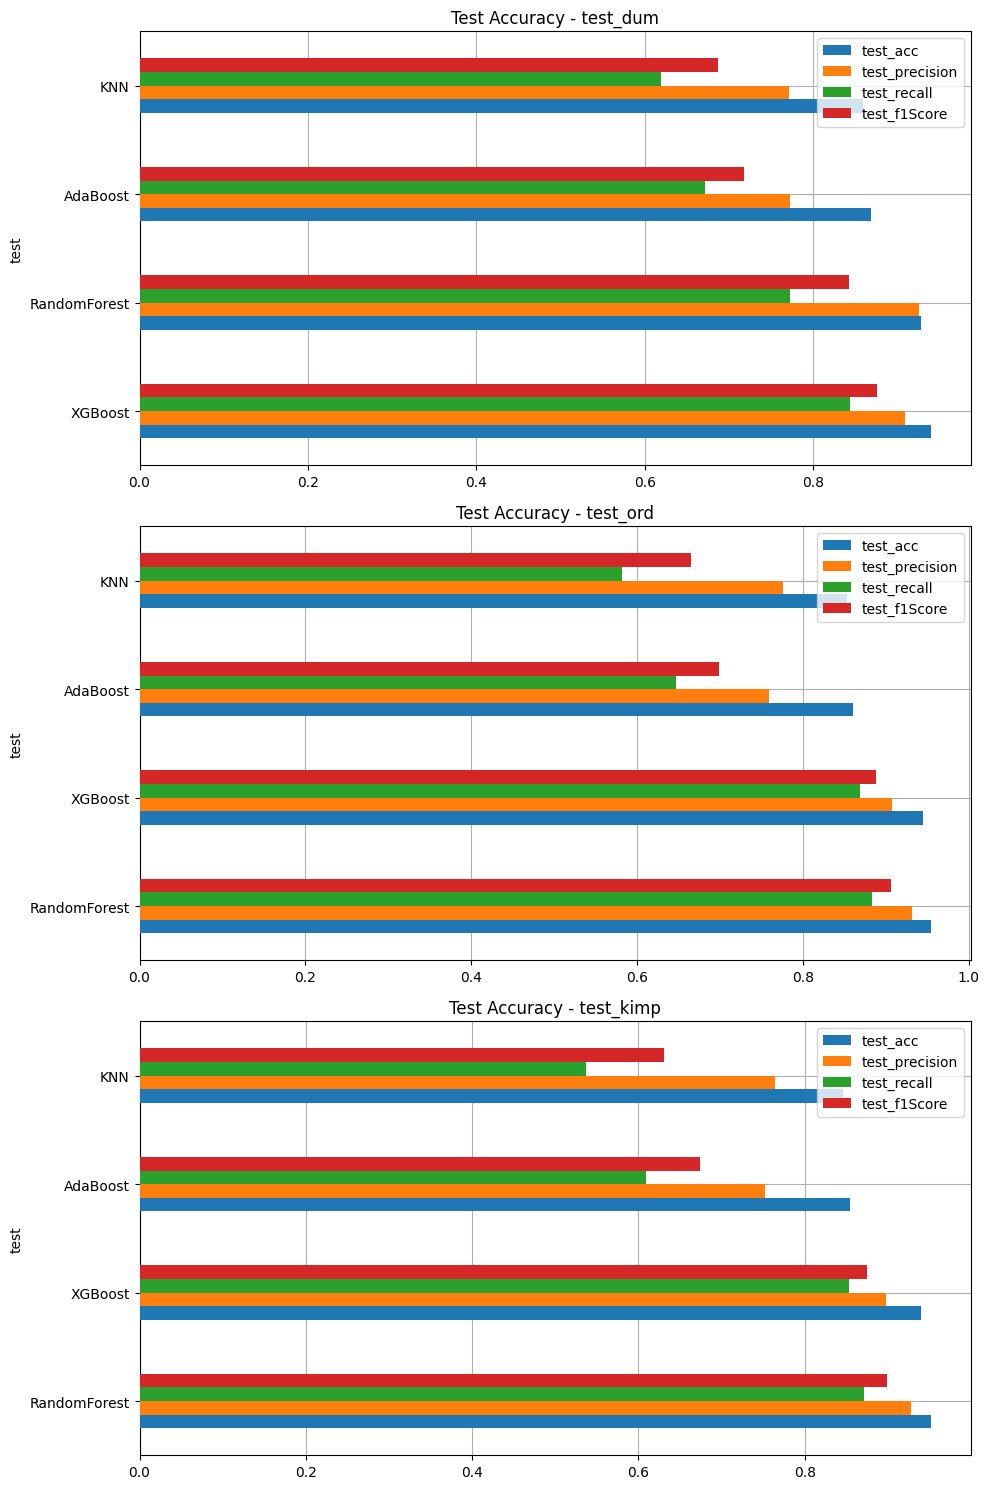

In [139]:
fig, ax = plt.subplots(nrows = 3, figsize = (10, 15))

test_dum.sort_values(by = 'test_acc', ascending = False).plot(kind ='barh', ax = ax[0], zorder = 3)
ax[0].set_ylabel('test')
ax[0].set_title('Test Accuracy - test_dum')
ax[0].grid(zorder = 0)

test_ord.sort_values(by = 'test_acc', ascending = False).plot(kind = 'barh', ax = ax[1], zorder = 3)
ax[1].set_ylabel('test')
ax[1].set_title('Test Accuracy - test_ord')
ax[1].grid(zorder = 0)

test_kimp.sort_values(by = 'test_acc', ascending = False).plot(kind = 'barh', ax = ax[2], zorder = 3)
ax[2].set_ylabel('test')
ax[2].set_title('Test Accuracy - test_kimp')
ax[2].grid(zorder = 0)

plt.tight_layout()
plt.show()

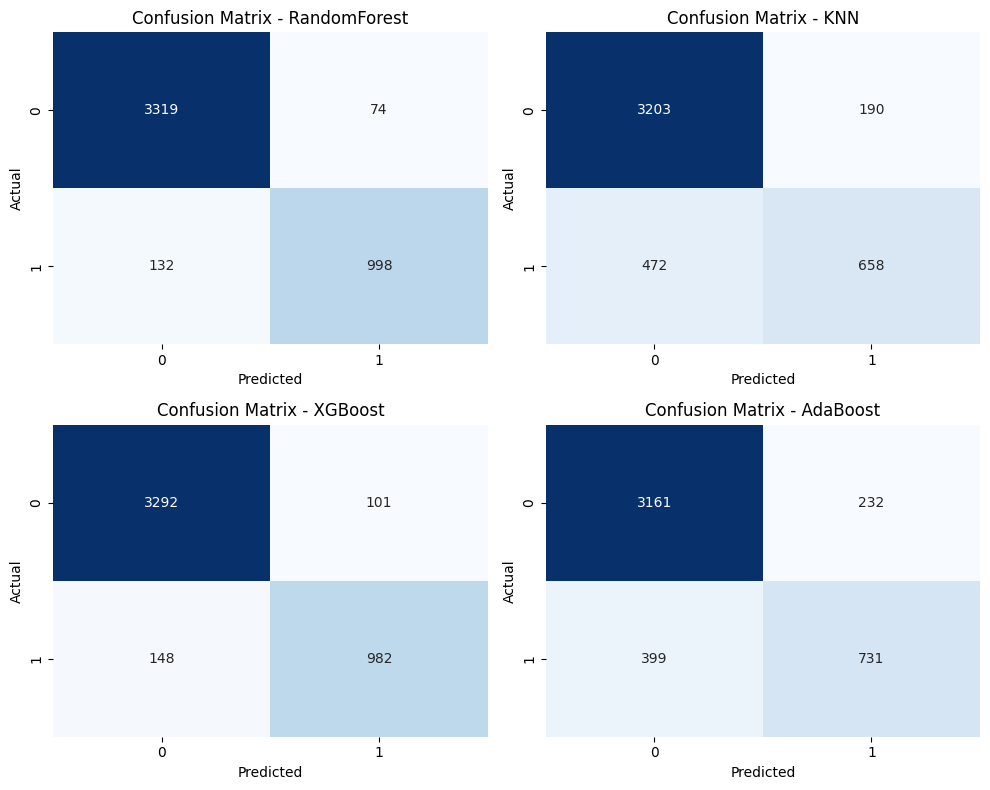

In [140]:
from sklearn.metrics import confusion_matrix

# confusion matrix builder
def plot_confusion_matrix(model_name, y_true, y_pred, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, ax = ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')


# show the confusion matrix
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))

plot_confusion_matrix('RandomForest', y_test_do, forrest_test_ord, ax[0, 0])
plot_confusion_matrix('KNN', y_test_do, knn_test_ord, ax[0, 1])
plot_confusion_matrix('XGBoost', y_test_do, xgb_test_ord, ax[1, 0])
plot_confusion_matrix('AdaBoost', y_test_do, ada_test_ord, ax[1, 1])

plt.tight_layout()
plt.show()

Dari confusion matrix ini dapat dilihat lebih jelas bahwa dari segi TN, TP, FN dan FP, ***Random Forest dan XGBoost*** merupakan dua model dengan performa terbaik.

Dengan mendapatkan nilai paling tinggi di semua metrik secara konsisten, maka dapat disimpulkan solusi dan model terbaik untuk problem ini adalah *Random Forest*.

***Test Prediction***

---



In [141]:
# Prediction
model_dict = {'KNN' : knn, 'RandomForest' : forest, 'XGBoost' : xgb, 'AdaBoost' : ada}

prediction = x_test_do.iloc[:10].copy()
pred_dict = {'y_true':y_test_do[:10]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)

,y_true,prediction_KNN,prediction_RandomForest,prediction_XGBoost,prediction_AdaBoost
18656,0,0,0,0,0
5919,0,0,0,0,0
1728,1,0,1,0,1
37326,0,0,0,0,0
18002,0,1,1,0,0
13968,1,0,0,0,0
38832,0,0,0,0,0
37117,1,0,0,0,0
21432,0,0,0,0,0
28193,0,0,0,0,0



***Kesimpulan Akhir***

---

1. Fitur-fitur yang paling berpengaruh terhadap income pada problem ini adalah educationClass, status, dan relationship.
2. Ya, income dapat diprediksi, dan berdasarkan nilai *Accuracy, Recall, Precision, dan F1 Score*, model Random Forest adalah model dengan performa terbaik, mencapai akurasi hingga 95,4%, presisi hingga 93%, recall 88,3%, dan F1Score 90,6%. Hal ini merupakan salah satu bentuk kelebihan dari Random Forest yaitu sifatnya yang melakukan *feature selection* secara implisit. Ditambah lagi sifat yang diwariskan dari *ensemble learning*, yaitu tahan pada bias dan overfitting.
3. Terdapat pengaruh yang dapat diamati dalam bentuk peningkatan performa model jika pengawetan ordinalitas (jika ada dalam dataset) dilakukan.
4. *KNN Imputation* memiliki dampak yang kurang signifikan jika dibandingkan dengan poin nomor 3, namun performa tetap meningkat.

---

*Untuk selengkaptnya dapat merujuk kembali ke Laporan Proyek lengkap (.md)*
